### Use ```np.linspace``` 
Use ```np.linspace``` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

- Extract every 10th element using slice notation
- Reverse the array using slice notation
- Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
- Make a plot showing the sin and cos functions and indicate where they are close

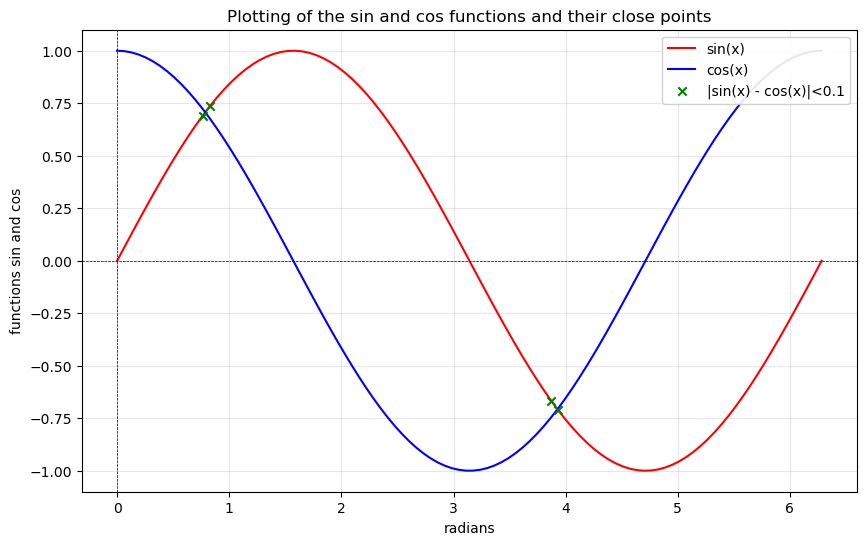

In [22]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# initialization of the arrays
n = 100
divided_pi = np.linspace(0, 2*np.pi, n)
dec_elements = divided_pi[::10]
reversed_divided_pi = divided_pi[::-1]

# definition of sin and cosin as functions
sin_array = np.sin(divided_pi)
cos_array = np.cos(divided_pi)
# difference of the arrays elements
diff = np.abs(sin_array - cos_array)

# mask to filter the closest points
mask = diff < 0.1
close_points = divided_pi[diff < 0.1]
close_values = sin_array[mask]

# plotting of the arrays
plt.figure(figsize=(10, 6))
plt.plot(divided_pi, sin_array, 'r-', label='sin(x)')
plt.plot(divided_pi, cos_array, 'b-', label='cos(x)')
# scatter plot of the closest points
plt.scatter(close_points, close_values, marker='x', color='green', label='|sin(x) - cos(x)|<0.1', zorder=3)

plt.xlabel('radians', fontsize=10)
plt.ylabel('functions sin and cos', fontsize=10)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Plot of the sin and cos functions and their close points')
plt.grid(alpha=0.3)
plt.legend(loc='upper right', framealpha=0.9)
plt.show()

* Download a file named `data.csv` from [here](https://www.dropbox.com/scl/fi/kziuw2cw2ag1awqil0te3/data.csv?rlkey=qx5i8732ekl6japbmrp6675q9&dl=0). Make a copy of that file  removing the metadata and the commas between numbers; call it `data.txt`
* How many even numbers are there?
* Distinguish the entries on the basis of `sqrt(X^2 + Y^2 + Z^2)` is greater or smaller than `100*sqrt(3)/2`. Count the entries of each of the two groups 
* Make `n` copies of data.txt (with `n` an input parameter of the script), where the i-th copy has all the numbers divided by i (with `1<=i<=n`)


In [ ]:
import pandas as pd
import math as m

# download of the file 
%%bash
wget https://https://www.dropbox.com/scl/fi/kziuw2cw2ag1awqil0te3/data.csv?rlkey=qx5i8732ekl6japbmrp6675q9&e=1&dl=0

# creatio of a dataframe replacing commas with tabs
df = pd.read_csv('path\\data.csv', skiprows=4)
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.replace(',', '')
        df = pd.read_csv('path\\data.csv')

# we have 6 columns of data, so we concatenate at group of three so that we have a unique list of X, Y, Z
prime_colonne = df.iloc[:, :3]
ultime_colonne = df.iloc[:, 3:]
df_riorganizzato = pd.concat([prime_colonne, ultime_colonne], axis=1)

df.to_csv('data.txt', index=False, header=False, sep=' ')

# counting the even numbers in the dataframe 
N_even = 0
for col in df.columns:
    for j in range(len(df)):
        if df.loc[j, col] % 2 == 0: N_even += 1
print(f"The numbers of even numbers are {N_even}")

# dividing in two groups and counting the entries for each group
N_1_group, N_2_group = 0, 0
df.columns['X', 'Y', 'Z']
for row in df.iterrows():
    distance = m.sqrt(row['X']**2 + row['Y']**2 + row['Z']**2)
    threshold = 100*sqrt(3)/2
    if distance < threshold: N_1_group += 1
    elif distance >= threshold: N_2_group += 1
print(f"The numbers of elements such that 'sqrt(X^2 + Y^2 + Z^2) < 100*sqrt(3)/2' is: {N_1_group}, while the elements such that is greater than the threshold are:{N_2_group} ")

### PCA on 3D dataset

- Generate a dataset with three features each with $\rm N$ entries ($\rm N$ being $O(1000)$). With $N(\mu,\,\sigma)$ the normal distribution with mean $\mu$ and standard deviation $\sigma$, generate the 3 variables 
 such that:
 - $x_1$ is distributed as $N(0,\, 1)$
 - $x_2$ is distributed as $x_1 + N(0,\,3)$
 - $x_3$ is given by $2x_1+x_2$

- Find the eigenvectors and eigenvalues of the covariance matrix of the dataset.
- Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result.

What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? 
- Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
- Redefine the data in the basis yielded by the PCA procedure.
- Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import scipy as sp

# number of elements for each collection of random variables
N = 2000

# generation of the three arrays of random vars, x3 is combinations of the first two variables
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

# creation of the dataframe
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3}
)
covariance_matrix = np.cov(df.T)
eigenvalues, eigenvectors = sp.linalg.eigh(covariance_matrix)
print(f"The eigenvalues are {eigenvalues} and the eigenvectors are {eigenvectors}")

U, S, VT = sp.linalg.svd(covariance_matrix)
eigenvalues_svd = S**2/(N-1)
eigenvectors_left = U
eigenvectors_right = VT.T

for eig in eigenvalues:
    print(' ', 100*(eig.real)/(np.sum(eigenvalues.real)), '%')

# redefining of the dataset for PCA basis
rdata = pd.DataFrame(np.dot(VT, df.T).T, columns=['PC1', 'PC2', 'PC3'])

axs[0, 0].scatter(df['x1'], df['x2'])
axs[0, 0].set_title('x1 vs x2')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 1].scatter(df['x1'], df['x3'])
axs[0, 1].set_title('x1 vs x3')
axs[0, 1].set_xlabel('x1')
axs[0, 1].set_ylabel('x3')

axs[0, 2].scatter(df['x2'], df['x3'])
axs[0, 2].set_title('x2 vs x3')
axs[0, 2].set_xlabel('x2')
axs[0, 2].set_ylabel('x3')

# Plot dei dati trasformati
axs[1, 0].scatter(rdata['PC1'], rdata['PC2'])
axs[1, 0].set_title('PC1 vs PC2')
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')

axs[1, 1].scatter(rdata['PC1'], rdata['PC3'])
axs[1, 1].set_title('PC1 vs PC3')
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC3')

axs[1, 2].scatter(rdata['PC2'], rdata['PC3'])
axs[1, 2].set_title('PC2 vs PC3')
axs[1, 2].set_xlabel('PC2')
axs[1, 2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

The eigenvalues are [5.78929620e-16 2.03296412e+00 2.62914515e+01] and the eigenvectors are [[-0.81649658  0.56559357 -0.11591914]
 [-0.40824829 -0.70756494 -0.57678868]
 [ 0.40824829  0.4236222  -0.80862696]]
  2.0439243236777077e-15 %
  7.1774265290434265 %
  92.82257347095657 %
             0         1             2
0    -5.051148 -1.190633  1.196477e-15
1     8.269071 -0.613903  4.366847e-17
2     0.263516 -1.304106  1.310901e-15
3     6.268681 -2.226674  2.369422e-15
4    -5.936008 -1.745075  1.732691e-15
...        ...       ...           ...
1995  0.597911  0.995424 -1.029492e-15
1996  3.532915  0.790405 -7.862707e-16
1997  6.975679 -0.985048  7.454294e-16
1998 -0.334351 -1.818894  1.792599e-15
1999 -8.050582  0.937597 -5.371735e-16

[2000 rows x 3 columns]


,0,1,2
0,-5.051148,-1.190633,1.196477e-15
1,8.269071,-0.613903,4.366847e-17
2,0.263516,-1.304106,1.310901e-15
3,6.268681,-2.226674,2.369422e-15
4,-5.936008,-1.745075,1.732691e-15
...,...,...,...
1995,0.597911,0.995424,-1.029492e-15
1996,3.532915,0.790405,-7.862707e-16
1997,6.975679,-0.985048,7.454294e-16
1998,-0.334351,-1.818894,1.792599e-15


### 2D minimization of a six-hump camelback function
 
$$
f(x,\,y)= (4-2.1x^2 + \frac{x^4}{3})x^2 + xy+(4y^2-4)y^2
$$
has multiple global and local minima. Find the global minima of this function.

Hints:

- Variables can be restricted to $-2<x<2$ and $-1<y<1$.
- Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
- Use `scipy.optimize.minimize()`, optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x,y)=(0,0)$?

In [ ]:
import math as m
import pandas as pd
import numpy as np

def function(x, y):
    return (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y + (4*y**2 - 4)*y**2

def f_optimization(X):
    return function(X[0], X[1])

x, y = np.linspace(-2, 2, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

Z = function(X, Y)

# plotting
plt.figure(figsize=(8,6), dpi=80)
plt.axes(projection='3d')
plt.set_xlabel('x')
plt.set_ylabel('y')
plt.set_zlabel('z')

guesses, minimum = [], []

bounds, x0 = [(-2, 2), (-1, -0.1)], (-1, 0.9)
optimal = sp.optimize.minimize(f_optimization, x0, bounds=bounds)
guesses.append(x0)
minimum.append(optimal.x)

bounds, x0 = [(-2, 2), (0.1, 1)], (1, -0.9)
optimal = sp.optimize.minimize(f_optimization, x0, bounds=bounds)
guesses.append(x0)
minimum.append(optimal.x)

plt.figure(figsize=(8,6))
plt.imshow(f(X,Y), extent=[-2, 2, -1, 1], origin='lower')
plt.colorbar(shrink=0.5 ,aspect=20*0.7)
plt.title('The six-hump camelback function')

for idx, x0 in enumerate(guesses):
    mm = minimum[idx]
    print(f"The minimums are found at: {mm} with value {f_optimization(mm)}, starting with initial guess: {guesses}")
    plt.scatter(x0[0], x0[1], color='r', marker='x', label='initial guess')
    plt.scatter(mm[0], mm[1], color='y', label='converged value')   

plt.tight_layout()
plt.legend()
plt.show()

### Rutherford Scattering

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:
$$
\tan\frac{1}{2}\theta = \frac{Ze^2}{2\pi\epsilon_0 E b}
$$ 
 
where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma = a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back", i.e. those particle whose scattering angle is greater than 
$\pi/2$ (which set a condition on the impact parameter $b$)

In [ ]:
import math as m
import pandas as pd
import numpy as np
import matplotlyb.pyplot as plt

# constants of the experiment
Z = 79                 # Atomic number
E = 7.7                # Energy of the beam [MeV]
a0 =  5.9e-11          # Bohr radius [m]
e  = -1.6e-19          # Elementary charge [C]
sigma = a0/100         # Cross section
E *= abs(e) * 1e6      #  converting E to Joule
alpha = 10**6
epsilon_0 = 8.85e-12
# b can be represented by a gaussian distribution
x, y = np.random.normal(0, sigma, alpha), np.random.normal(0, sigma, alpha)
b = m.sqrt(x**2 + y**2)

theta = 2 * np.arctan((Z*e**2) / (2*m.pi*epsilon_0*E*b))
bounce_back = np.sum(theta > m.pi/2)

print(f"The numbers of alpha-particles that bounced back are: {bounce_back} over N throws, so the percentage is: {bounced_back*100/N}%")